In [1]:
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from plotly.offline import init_notebook_mode, iplot
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go
init_notebook_mode(connected=True)

import numpy as np
import matplotlib.pyplot as plt

#set dataframe to display with max column width and 500 rows of data so we can see the Country and Indicators dataframes
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)

#load our prepped Excel workbook from World Bank
excelWorkbook = pd.ExcelFile('worldbank_2019_data.xlsx') 

#transform Excel sheets into dataframes by sheet index
df = pd.read_excel(excelWorkbook, 0)
countries = pd.read_excel(excelWorkbook, 1)
indicators = pd.read_excel(excelWorkbook, 2)

In [2]:
df.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018'],
      dtype='object')

In [3]:
#put the year columns we're concerned about in a list for easier reference
yearCols = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']

In [4]:
print(countries.columns)
display(countries[['TableName', 'Country Code', 'Region', 'IncomeGroup' ]])

Index(['Country Code', 'Region', 'IncomeGroup', 'SpecialNotes', 'TableName'], dtype='object')


,TableName,Country Code,Region,IncomeGroup
0,Aruba,ABW,Latin America & Caribbean,High income
1,Afghanistan,AFG,South Asia,Low income
2,Angola,AGO,Sub-Saharan Africa,Lower middle income
3,Albania,ALB,Europe & Central Asia,Upper middle income
4,Andorra,AND,Europe & Central Asia,High income
5,Arab World,ARB,NaN,NaN
6,United Arab Emirates,ARE,Middle East & North Africa,High income
7,Argentina,ARG,Latin America & Caribbean,High income
8,Armenia,ARM,Europe & Central Asia,Upper middle income
9,American Samoa,ASM,East Asia & Pacific,Upper middle income


In [5]:
print(indicators.columns)
display(indicators[['INDICATOR_CODE', 'INDICATOR_NAME']])

Index(['INDICATOR_CODE', 'INDICATOR_NAME', 'SOURCE_NOTE',
       'SOURCE_ORGANIZATION'],
      dtype='object')


,INDICATOR_CODE,INDICATOR_NAME
0,SP.POP.1564.TO.ZS,Population ages 15-64 (% of total)
1,SP.POP.0014.TO.ZS,Population ages 0-14 (% of total)
2,SL.UEM.TOTL.ZS,"Unemployment, total (% of total labor force) (modeled ILO estimate)"
3,SL.UEM.TOTL.MA.ZS,"Unemployment, male (% of male labor force) (modeled ILO estimate)"
4,SL.UEM.TOTL.FE.ZS,"Unemployment, female (% of female labor force) (modeled ILO estimate)"
5,SL.TLF.TOTL.IN,"Labor force, total"
6,SL.TLF.TOTL.FE.ZS,"Labor force, female (% of total labor force)"
7,SE.XPD.TOTL.GD.ZS,"Government expenditure on education, total (% of GDP)"
8,SE.XPD.TOTL.GB.ZS,"Government expenditure on education, total (% of government expenditure)"
9,SE.XPD.TERT.ZS,Expenditure on tertiary education (% of government expenditure on education)


In [6]:
#put the indicator codes we want to use in our analyses in a list for easier reference
# SE.XPD.TOTL.GD.ZS = Government expenditure on education, total (% of GDP)
# SE.XPD.SECO.PC.ZS = Government expenditure per student, secondary (% of GDP per capita)
# SE.XPD.PRIM.PC.ZS = Government expenditure per student, primary (% of GDP per capita)
# SL.UEM.TOTL.ZS = Unemployment, total (% of total labor force) (modeled ILO estimate)
# SL.TLF.TOTL.IN = Labor force, total

platosIndicators = ['SE.XPD.TOTL.GD.ZS','SE.XPD.SECO.PC.ZS','SE.XPD.PRIM.PC.ZS', 'SL.UEM.TOTL.ZS', 'SL.TLF.TOTL.IN']
print(platosIndicators)

['SE.XPD.TOTL.GD.ZS', 'SE.XPD.SECO.PC.ZS', 'SE.XPD.PRIM.PC.ZS', 'SL.UEM.TOTL.ZS', 'SL.TLF.TOTL.IN']


In [7]:
#merge columns from countries into main data
df1 = pd.merge(df, countries, on='Country Code')
df1.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', 'Region', 'IncomeGroup',
       'SpecialNotes', 'TableName'],
      dtype='object')

In [8]:
#merge columns from indicators into main data
df2 = pd.merge(df1, indicators, left_on='Indicator Code', right_on='INDICATOR_CODE')
df2.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', 'Region', 'IncomeGroup',
       'SpecialNotes', 'TableName', 'INDICATOR_CODE', 'INDICATOR_NAME',
       'SOURCE_NOTE', 'SOURCE_ORGANIZATION'],
      dtype='object')

In [9]:
#drop unwanted columns
df3 = df2.drop(['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2016', '2017', '2018', 'SpecialNotes', 'TableName', 'INDICATOR_CODE', 'INDICATOR_NAME','SOURCE_NOTE', 'SOURCE_ORGANIZATION'],axis=1)
df3.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', 'Region',
       'IncomeGroup'],
      dtype='object')

In [10]:
# convert the columns to a list and reorder them for better readability
cols = df3.columns.tolist()
cols = cols[0:2] + cols[-2:] + cols[2:-2]
print(cols)

['Country Name', 'Country Code', 'Region', 'IncomeGroup', 'Indicator Name', 'Indicator Code', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']


In [11]:
#reduce our dataframe down to only the columns we want to work with - namely year 2000 - 2015
df3 = df3[cols]
#add an 'avgs' column to the end that gets the mean value for the column range from 2000 - 2015 - NaN excluced by default
df3['avgs'] = df3[yearCols].mean(axis = 1)
#show us a sample of the new frame
df3.head()

,Country Name,Country Code,Region,IncomeGroup,Indicator Name,Indicator Code,2000,2001,2002,2003,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,avgs
0,Aruba,ABW,Latin America & Caribbean,High income,Population ages 15-64 (% of total),SP.POP.1564.TO.ZS,69.240421,69.323344,69.421636,69.554820,...,69.691761,69.448364,69.161089,68.838092,68.882835,68.976476,69.090099,69.165181,69.159774,69.342547
1,Afghanistan,AFG,South Asia,Low income,Population ages 15-64 (% of total),SP.POP.1564.TO.ZS,49.182015,49.278617,49.467248,49.701669,...,49.942311,49.836413,49.815480,49.898603,50.319337,50.883182,51.545931,52.253100,52.974876,50.337468
2,Angola,AGO,Sub-Saharan Africa,Lower middle income,Population ages 15-64 (% of total),SP.POP.1564.TO.ZS,50.130735,50.123345,50.163814,50.232256,...,50.292930,50.290849,50.317153,50.370243,50.327156,50.349958,50.416077,50.505664,50.613384,50.324273
3,Albania,ALB,Europe & Central Asia,Upper middle income,Population ages 15-64 (% of total),SP.POP.1564.TO.ZS,62.662197,63.064436,63.513869,64.003112,...,65.953748,66.316860,66.619749,66.860680,67.520815,68.110597,68.645567,69.103098,69.436421,66.053321
4,Andorra,AND,Europe & Central Asia,High income,Population ages 15-64 (% of total),SP.POP.1564.TO.ZS,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#reduce the table down to the rows with indicators we only are concerned with
df4 = df3.loc[df3['Indicator Code'].isin(platosIndicators)]
df4.head()

,Country Name,Country Code,Region,IncomeGroup,Indicator Name,Indicator Code,2000,2001,2002,2003,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,avgs
526,Aruba,ABW,Latin America & Caribbean,High income,"Unemployment, total (% of total labor force) (modeled ILO estimate)",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
527,Afghanistan,AFG,South Asia,Low income,"Unemployment, total (% of total labor force) (modeled ILO estimate)",SL.UEM.TOTL.ZS,11.184000,11.584,8.691000,8.853,...,7.802000,8.755,6.705,7.821,8.23,7.936,8.452,8.706,8.864,8.819438
528,Angola,AGO,Sub-Saharan Africa,Lower middle income,"Unemployment, total (% of total labor force) (modeled ILO estimate)",SL.UEM.TOTL.ZS,23.733999,23.725,23.790001,23.628,...,16.804001,14.499,12.137,9.863,7.36,7.347,7.331,7.306,7.281,15.555500
529,Albania,ALB,Europe & Central Asia,Upper middle income,"Unemployment, total (% of total labor force) (modeled ILO estimate)",SL.UEM.TOTL.ZS,22.730000,22.680,21.488001,20.153,...,13.500000,13.050,13.760,14.200,13.98,13.440,15.640,17.490,17.080,16.969500
530,Andorra,AND,Europe & Central Asia,High income,"Unemployment, total (% of total labor force) (modeled ILO estimate)",SL.UEM.TOTL.ZS,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#drop the columns 2000 - 2015 now that we have the avgs column
df5 = df4[['Country Name', 'Country Code', 'Region', 'IncomeGroup', 'Indicator Name', 'Indicator Code','avgs']]
df5.head()

,Country Name,Country Code,Region,IncomeGroup,Indicator Name,Indicator Code,avgs
526,Aruba,ABW,Latin America & Caribbean,High income,"Unemployment, total (% of total labor force) (modeled ILO estimate)",SL.UEM.TOTL.ZS,NaN
527,Afghanistan,AFG,South Asia,Low income,"Unemployment, total (% of total labor force) (modeled ILO estimate)",SL.UEM.TOTL.ZS,8.819438
528,Angola,AGO,Sub-Saharan Africa,Lower middle income,"Unemployment, total (% of total labor force) (modeled ILO estimate)",SL.UEM.TOTL.ZS,15.555500
529,Albania,ALB,Europe & Central Asia,Upper middle income,"Unemployment, total (% of total labor force) (modeled ILO estimate)",SL.UEM.TOTL.ZS,16.969500
530,Andorra,AND,Europe & Central Asia,High income,"Unemployment, total (% of total labor force) (modeled ILO estimate)",SL.UEM.TOTL.ZS,NaN


In [14]:
df6 = df5.pivot_table(index=['Country Code', 'Country Name', 'Region', 'IncomeGroup'], columns='Indicator Code', values='avgs')
display(df6.head())

,,,Indicator Code,SE.XPD.PRIM.PC.ZS,SE.XPD.SECO.PC.ZS,SE.XPD.TOTL.GD.ZS,SL.TLF.TOTL.IN,SL.UEM.TOTL.ZS
Country Code,Country Name,Region,IncomeGroup,,,,,
ABW,Aruba,Latin America & Caribbean,High income,14.307146,19.881711,5.589620,NaN,NaN
AFG,Afghanistan,South Asia,Low income,9.006358,9.336752,3.295752,7455358.750,8.819438
AGO,Angola,Sub-Saharan Africa,Lower middle income,NaN,NaN,2.929383,8876532.625,15.555500
ALB,Albania,Europe & Central Asia,Upper middle income,29.845680,6.325250,3.256037,1286879.000,16.969500
AND,Andorra,Europe & Central Asia,High income,12.315729,11.579245,2.503215,NaN,NaN


In [15]:
df6.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Indicator Code,,,,,,,,
SE.XPD.PRIM.PC.ZS,166.0,1.508239e+01,8.599067e+00,2.787440,9.867825e+00,1.390919e+01,1.871554e+01,7.910347e+01
SE.XPD.SECO.PC.ZS,159.0,1.950976e+01,9.872545e+00,4.173363,1.296927e+01,1.819346e+01,2.330720e+01,5.697714e+01
SE.XPD.TOTL.GD.ZS,189.0,4.542366e+00,1.962077e+00,0.787440,3.157230e+00,4.309667e+00,5.514589e+00,1.158699e+01
SL.TLF.TOTL.IN,187.0,1.644947e+07,6.728397e+07,36735.562500,1.002588e+06,3.442921e+06,9.752879e+06,7.695131e+08
SL.UEM.TOTL.ZS,187.0,8.440527e+00,5.827556e+00,0.805187,4.240125e+00,6.968750e+00,1.100294e+01,3.251125e+01


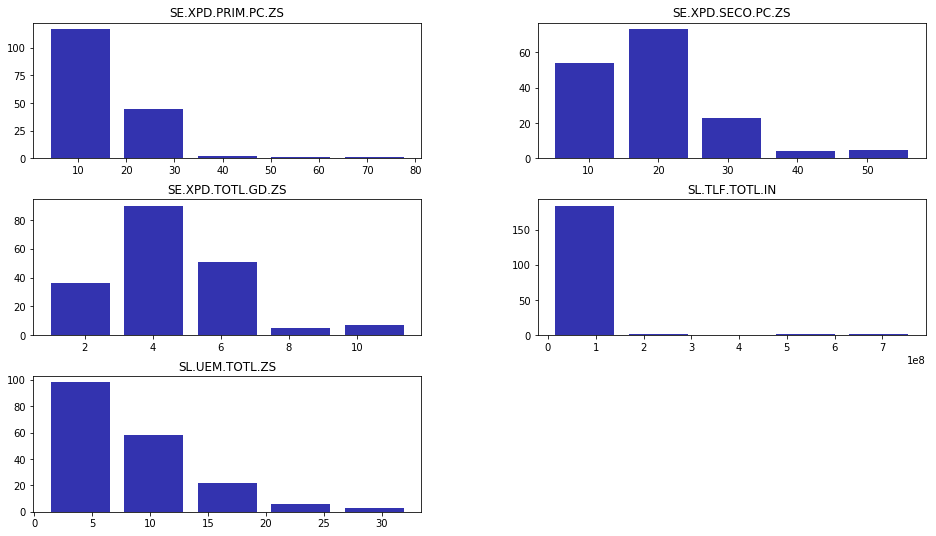

In [16]:
 hist = df6.hist(bins=5, grid=False, figsize=(16,9), color='#3333af', zorder=2, rwidth=0.8)

In [17]:
# Key to Indicators

# SE.XPD.SECO.PC.ZS = Government expenditure per student, secondary (% of GDP per capita)
# SE.XPD.PRIM.PC.ZS = Government expenditure per student, primary (% of GDP per capita)
# SE.XPD.TOTL.GD.ZS = Government expenditure on education, total (% of GDP)
# SL.TLF.TOTL.IN = Labor force, total
# SL.UEM.TOTL.ZS = Unemployment, total (% of total labor force) (modeled ILO estimate)

df6.corr(method='pearson')

Indicator Code,SE.XPD.PRIM.PC.ZS,SE.XPD.SECO.PC.ZS,SE.XPD.TOTL.GD.ZS,SL.TLF.TOTL.IN,SL.UEM.TOTL.ZS
Indicator Code,,,,,
SE.XPD.PRIM.PC.ZS,1.000000,0.422011,0.659204,-0.039683,0.176196
SE.XPD.SECO.PC.ZS,0.422011,1.000000,0.614354,-0.051208,0.183122
SE.XPD.TOTL.GD.ZS,0.659204,0.614354,1.000000,-0.078229,0.179849
SL.TLF.TOTL.IN,-0.039683,-0.051208,-0.078229,1.000000,-0.112347
SL.UEM.TOTL.ZS,0.176196,0.183122,0.179849,-0.112347,1.000000


In [18]:
df_train = df6.dropna()
df_train.count()

Indicator Code
SE.XPD.PRIM.PC.ZS    140
SE.XPD.SECO.PC.ZS    140
SE.XPD.TOTL.GD.ZS    140
SL.TLF.TOTL.IN       140
SL.UEM.TOTL.ZS       140
dtype: int64

In [23]:
# SE.XPD.SECO.PC.ZS = Government expenditure per student, secondary (% of GDP per capita)
# SL.TLF.TOTL.IN = Labor force, total
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_train[['SE.XPD.PRIM.PC.ZS', 'SL.TLF.TOTL.IN']])
display(kmeans.cluster_centers_)
display(kmeans.labels_)

array([[1.52543253e+01, 1.02842435e+07],
       [1.04758539e+01, 4.62000288e+08]])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [24]:
# SE.XPD.PRIM.PC.ZS = Government expenditure per student, primary (% of GDP per capita)
# SL.TLF.TOTL.IN = Labor force, total
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_train[['SE.XPD.SECO.PC.ZS', 'SL.TLF.TOTL.IN']])
display(kmeans.cluster_centers_)
display(kmeans.labels_)

array([[2.00875070e+01, 1.02842435e+07],
       [1.80946965e+01, 4.62000288e+08]])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [26]:
# SE.XPD.TOTL.GD.ZS = Government expenditure on education, total (% of GDP)
# SL.TLF.TOTL.IN = Labor force, total
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_train[['SE.XPD.TOTL.GD.ZS', 'SL.TLF.TOTL.IN']])
display(kmeans.cluster_centers_)
display(kmeans.labels_)

array([[4.63950120e+00, 1.02842435e+07],
       [3.61493200e+00, 4.62000288e+08]])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [27]:
# SE.XPD.TOTL.GD.ZS = Government expenditure on education, total (% of GDP)
# SL.UEM.TOTL.ZS = Unemployment, total (% of total labor force) (modeled ILO estimate)kmeans = KMeans(n_clusters=2, random_state=0).fit(df_train[['SE.XPD.TOTL.GD.ZS', 'SL.UEM.TOTL.ZS']])
display(kmeans.cluster_centers_)
display(kmeans.labels_)

array([[ 5.15117953, 15.45630177],
       [ 4.45918395,  5.54970774]])

array([1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1], dtype=int32)